### Spam Detection 
Workflow:
- Reading the data
- Data Cleaning
- Feature Extraction(Vectorization)
- encode labels
- train/test/split
- train model
- evaluate model

In [4]:
import pandas as pd

data = pd.read_csv('/home/san/Desktop/spam-detection/datasets/spam mail.csv')

In [5]:
data.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.isna()

,Category,Masseges
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [8]:
data.columns

Index(['Category', 'Masseges'], dtype='object')

In [9]:
category_count = data['Category'].value_counts()
category_count

Category
ham     4825
spam     747
Name: count, dtype: int64

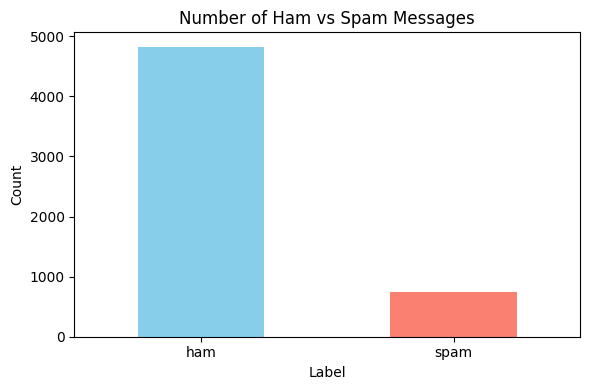

In [10]:
# !pip install matplotlib

import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(6,4))
category_count.plot(kind='bar', color=['skyblue', 'salmon'])

# Add labels and title
plt.title('Number of Ham vs Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()

### Seems pretty imbalanced data, Moving onto Text Processing



### Lowering Case:
- Ucase and Lcase words have differences while creating BOW, so Lcasing standardizes the meaning of the word.
- Lcasing decreases the size of the vocabulary, hence dimension reduction

In [11]:
data['Masseges'] = data['Masseges'].str.lower()
data.head()

,Category,Masseges
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


### Removing Punctuations
- Removes Noise
- Improves tokenization

In [16]:
import string

data['Masseges'] = data['Masseges'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

data['Masseges'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: Masseges, dtype: object

### Removing Stopwords
- Reduces Noise
- Reduces the size of the corpus
- Helps Vectorization

In [21]:
!pip install nltk

from nltk.corpus import stopwords
stopwords_en = stopwords.words("english")

def remove_stopwords(text):
    words = text.split() #tokenization
    filtered_words = [word for word in words if word not in stopwords_en]  # Remove stopwords
    return ' '.join(filtered_words)

data['Masseges'] = data['Masseges'].apply(remove_stopwords)
data['Masseges'].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: Masseges, dtype: object

### Tokenization
- required before vectorization
- enables frequency count (BoW,TF-IDF)

In [24]:
data['tokens'] = data['Masseges'].apply(lambda x: x.split())
data.head()

,Category,Masseges,tokens
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t..."


### Vectorization (Feature Extraction)
- text to numerical vector conversion
Methods: 
    - BOW
    - TF IDF
    - Word2Vec
    - GloVe
    - BERT

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data["Masseges"])

y = data["Category"].map({'ham' : 0, 'spam' : 1})

### Train,Test and Split

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)



1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Category, Length: 4457, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1115,))

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[961   4]
 [ 60  90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115



### Saving the vectorizer and Model


In [39]:
import joblib

# Save the vectorizer
joblib.dump(vectorizer, '/home/san/Desktop/spam-detection/models/vectorizer.pkl')

# Save the trained model
joblib.dump(model, '/home/san/Desktop/spam-detection/models/spam_classifier.pkl')


['/home/san/Desktop/spam-detection/models/spam_classifier.pkl']